[John Wittenauer](https://www.johnwittenauer.net/machine-learning-exercises-in-python-part-3/)

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
path = '/content/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

print(data.shape)

(100, 3)


Text(0, 0.5, 'Exam 1 Score')

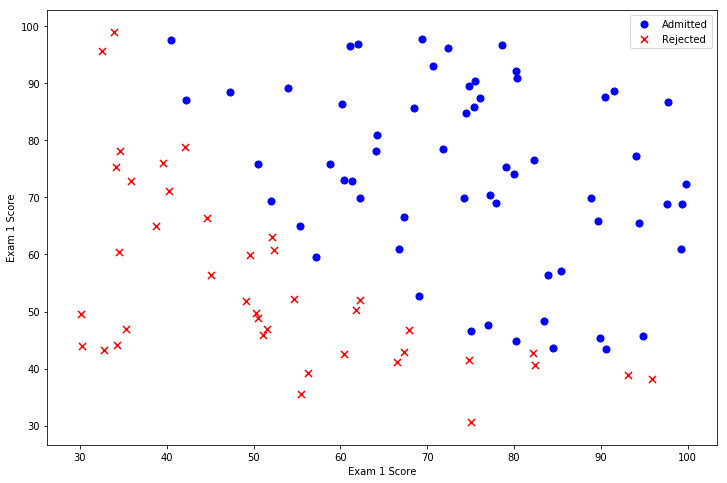

In [134]:

positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 1 Score')

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))


In [0]:
# import math
# nums = np.arange(-10, 11, step=1)
# print(np.log(20))
# print(math.log(20))
# fig, ax = plt.subplots(2,2)
# ax[0, 0].plot(nums, sigmoid(nums), 'r')
# ax[0, 0].set_title('ax[0, 0]')
# #ax.plot(nums, np.log(sigmoid(nums)), 'b')
# print(nums)
# zz = [round(x,3) for x in sigmoid(nums)]
# print([round(x,3) for x in sigmoid(nums)])
# ax[0, 1].plot(nums, np.log(sigmoid(nums)), 'b')
# ax[0, 1].set_title('ax[0, 1]')
# print([round(x,3) for x in np.log(sigmoid(nums))])
# ax[1, 0].plot(sigmoid(nums),np.log(sigmoid(nums)), 'g')
# ax[1, 0].set_title('ax[1, 0]')
# print([round(x,3) for x in (np.log(sigmoid(nums)) - np.log(1- sigmoid(nums))) ])
# ax[1, 1].plot(sigmoid(nums),(np.log(sigmoid(nums)) - np.log(1- sigmoid(nums))),'k')
# ax[1, 1].set_title('ax[1, 1]')
# df__ = pd.DataFrame({"nums":nums,"sigmoid":sigmoid(nums),"log-sigmoid":np.log(sigmoid(nums)),"log-sigmoid_2":(np.log(sigmoid(nums)) - np.log(1- sigmoid(nums)))})
# print(df__.head())
# df__

In [0]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [105]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)
print(data.head())

   Ones     Exam 1     Exam 2  Admitted
0     1  34.623660  78.024693         0
1     1  30.286711  43.894998         0
2     1  35.847409  72.902198         0
3     1  60.182599  86.308552         1
4     1  79.032736  75.344376         1


In [106]:

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

print(X.head())
print(y.head())
# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

   Ones     Exam 1     Exam 2
0     1  34.623660  78.024693
1     1  30.286711  43.894998
2     1  35.847409  72.902198
3     1  60.182599  86.308552
4     1  79.032736  75.344376
   Admitted
0         0
1         0
2         0
3         1
4         1


In [107]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [108]:
cost(theta, X, y)

0.6931471805599453

In [0]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [110]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
print(result)
cost(result[0], X, y)


(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)


0.20349770158947458

In [111]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))


accuracy = 89%


In [112]:
X.shape

(100, 3)

In [113]:
theta_min.T.shape

(3, 1)

In [114]:
X * theta_min.T

matrix([[-2.30107548e+00],
        [-1.00716518e+01],
        [-3.08073639e+00],
        [ 4.63894671e+00],
        [ 6.31747157e+00],
        [-4.51757958e+00],
        [ 6.88510628e+00],
        [-3.09539870e-01],
        [ 8.14540715e+00],
        [ 1.02213341e+00],
        [ 2.30966574e+00],
        [-3.52544777e+00],
        [ 7.22193055e+00],
        [ 8.83138080e+00],
        [-1.68801485e+00],
        [ 3.94195460e+00],
        [-2.91172275e-01],
        [-1.74412898e+00],
        [ 8.13348532e+00],
        [ 2.99338331e-01],
        [-2.63635453e+00],
        [ 6.58956134e+00],
        [-4.89639600e+00],
        [-9.19875151e+00],
        [ 4.80505442e+00],
        [ 1.77476005e+00],
        [ 4.06709932e-01],
        [ 1.85903841e+00],
        [-2.28480427e+00],
        [-4.06768426e+00],
        [ 2.16574300e+00],
        [ 3.94613908e+00],
        [-1.69659101e+00],
        [-4.39170606e-01],
        [-2.52492815e+00],
        [-3.37422483e+00],
        [ 1.75250099e+00],
 

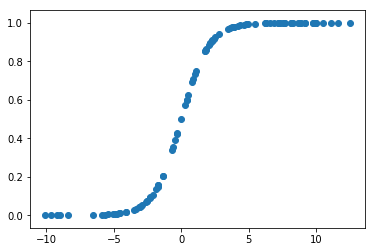

In [115]:
fig, ax = plt.subplots()
w = np.squeeze(np.asarray((X * theta_min.T).reshape(1,-1)))
#print(w )
t = np.squeeze(np.asarray(sigmoid(X * theta_min.T).reshape(1,-1)))
#print(t)
#print((X * theta_min.T).reshape(1,-1))
#print(sigmoid(X * theta_min.T).reshape(1,-1))
#ax.scatter(w, t, 'r')
plt.scatter(w,t)

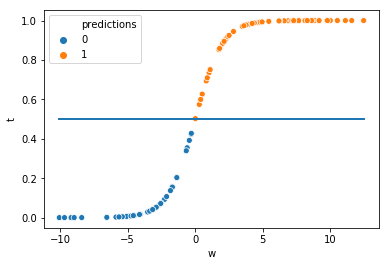

In [116]:
import seaborn as sns
iris_ = pd.DataFrame({"w":w,"t":t,"predictions":predictions})
sns.scatterplot(x='w', y='t',
              hue='predictions', data=iris_); 
plt.plot([np.min(w), np.max(w)], [0.5, 0.5], linewidth=2)

[-25.16131863   0.20623159   0.20147149]
-25.16131862777957 0.20623158859990537 0.2014714861690025


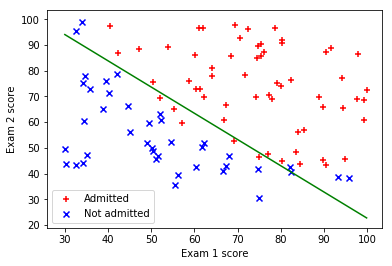

In [129]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
print(np.squeeze(np.asarray(theta_min.reshape(1,-1))))
theta_min = np.squeeze(np.asarray(theta_min.reshape(1,-1)))
print(theta_min[0],theta_min[1],theta_min[2])
y_value=-(theta_min[0] +theta_min[1]*x_value)/theta_min[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

     Test 1   Test 2  Accepted
0  0.051267  0.69956         1
1 -0.092742  0.68494         1
2 -0.213710  0.69225         1
3 -0.375000  0.50219         1
4 -0.513250  0.46564         1


Text(0, 0.5, 'Test 2 Score')

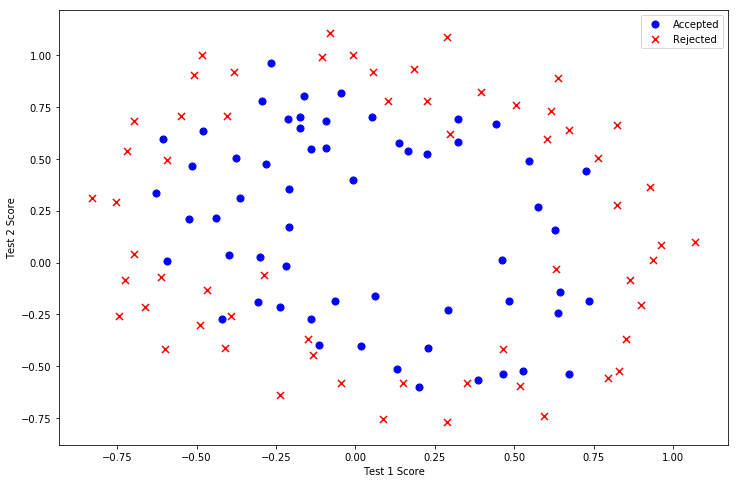

In [0]:
path ='/content/ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
print(data2.head())
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

### This data looks a bit more complicated than the previous example. In particular, you'll notice that there is no linear decision boundary that will perform well on this data. One way to deal with this using a linear technique like logistic regression is to construct features that are derived from polynomials of the original features. We can try creating a bunch of polynomial features to feed into the classifier.

In [0]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)
print(data2.head())
for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

     Test 1   Test 2  Accepted  Ones
0  0.051267  0.69956         1     1
1 -0.092742  0.68494         1     1
2 -0.213710  0.69225         1     1
3 -0.375000  0.50219         1     1
4 -0.513250  0.46564         1     1


,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [0]:
# def cost(theta, X, y):
#     theta = np.matrix(theta)
#     X = np.matrix(X)
#     y = np.matrix(y)
#     first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
#     second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
#     return np.sum(first - second) / (len(X))
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    print(theta,theta.shape[1])
    X = np.matrix(X)
    print(X,len(X))
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    print(np.power(theta[:,1:theta.shape[1]], 2))
    print(np.sum(np.power(theta[:,1:theta.shape[1]], 2)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

In [0]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

In [0]:
# set X and y (remember from above that we moved the label to column 0)
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]
pos , neg = (y2.values==1) , (y2.values==0)
#print(pos , neg)
# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)

learningRate = 0.1

costReg(theta2, X2, y2, learningRate)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 11
[[ 1.00000000e+00  5.12670000e-02  2.62830529e-03 ...  9.42624411e-05
   1.28625106e-03  1.75514423e-02]
 [ 1.00000000e+00 -9.27420000e-02  8.60107856e-03 ... -5.46363780e-04
   4.03513411e-03 -2.98012201e-02]
 [ 1.00000000e+00 -2.13710000e-01  4.56719641e-02 ... -6.75674451e-03
   2.18864648e-02 -7.08946949e-02]
 ...
 [ 1.00000000e+00 -4.84450000e-01  2.34691802e-01 ... -1.13613445e-01
   2.34349278e-01 -4.83389829e-01]
 [ 1.00000000e+00 -6.33640000e-03  4.01499650e-05 ... -2.54220521e-07
   4.00913674e-05 -6.32253341e-03]
 [ 1.00000000e+00  6.32650000e-01  4.00246023e-01 ... -7.75143736e-03
   3.75068364e-04 -1.81484119e-05]] 118
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0.0


0.6931471805599454

In [0]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
#result2

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 11
[[ 1.00000000e+00  5.12670000e-02  2.62830529e-03 ...  9.42624411e-05
   1.28625106e-03  1.75514423e-02]
 [ 1.00000000e+00 -9.27420000e-02  8.60107856e-03 ... -5.46363780e-04
   4.03513411e-03 -2.98012201e-02]
 [ 1.00000000e+00 -2.13710000e-01  4.56719641e-02 ... -6.75674451e-03
   2.18864648e-02 -7.08946949e-02]
 ...
 [ 1.00000000e+00 -4.84450000e-01  2.34691802e-01 ... -1.13613445e-01
   2.34349278e-01 -4.83389829e-01]
 [ 1.00000000e+00 -6.33640000e-03  4.01499650e-05 ... -2.54220521e-07
   4.00913674e-05 -6.32253341e-03]
 [ 1.00000000e+00  6.32650000e-01  4.00246023e-01 ... -7.75143736e-03
   3.75068364e-04 -1.81484119e-05]] 118
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0.0
[[-1.26281027e-10 -2.79964406e-10 -7.50193589e-10 -1.71383184e-10
  -2.73525524e-10 -1.09135120e-10 -1.22076939e-10 -5.86340181e-10
  -3.33672623e-11 -1.91629683e-10 -4.61330593e-11]] 11
[[ 1.00000000e+00  5.12670000e-02  2.62830529e-03 ...  9.42624411e-05
   1.28625106e-03  1.7551

In [0]:
type(result2)

tuple

In [0]:
result3 = (np.array([ 0.35872309, -3.22200653, 18.97106363, -4.25297831,
18.23053189, 20.36386672, 8.94114455, -43.77439015,
-17.93440473, -50.75071857, -2.84162964]), 110, 1)

In [0]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 81%


In [0]:
theta_min = np.matrix(result3[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 91%
